In [ ]:
#import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
#!wget 'https://storage.googleapis.com/kagglesdsdata/datasets%2F743822%2F1288099%2Fyolov3.cfg?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594258733&Signature=gE7KmDXZISb9EXuUUUlevSn7m6A07mRo8ISBQPxBsQ70CNmZgUL1vMnZRsfFao9mapFSpFFPFoOYuzD9qh9qlOXDJxbVRUV1mt0USYfmBrJZYa%2B1Ffk4UIzvZ7DWYgdQQZKVnb03jYrNjfezGE4l5CU9rNRv0T76iae7AYsYGKS1j%2BmdNzOBRnTYojZt%2FIjr4iEt6a6Ylng31f36hDPsvrn3K5bTNA1wGEO%2FsrWGFCItA%2FqoQ6sQ%2F3fTFAQYPYJJX9AHInMb0jKpPhgIASvWBdCvYcyV6PdjQUBFhclHY2hm4qovcJZ4uGuRpp6B1sgCTZsVuaycwmVpEtQM6HOs5A%3D%3D'

In [ ]:
#Load Yolo
net = cv2.dnn.readNet("/content/drive/My Drive/Colab Notebooks/Yolo/backup/yolov3_4000.weights", 
                      "/content/drive/My Drive/Colab Notebooks/Yolo/darknet/yolov3.cfg") #load weight

In [ ]:
classes = []
with open("/content/drive/My Drive/Colab Notebooks/Yolo/darknet/yolo.names","r") as file:
    lines = file.readlines()  
# line is now a list with all the individual lines of the file. Each line contain a classname

for line in lines:
    classes.append(line.strip())

print(type(classes), len(classes))
print(classes)
## now the classes list contains the name of all of the classes(80).

<class 'list'> 1
['Drone']


In [ ]:
## this function shows two images side-by-side
def plot_two_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1= fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2= fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

<class 'numpy.ndarray'> 386 580 3


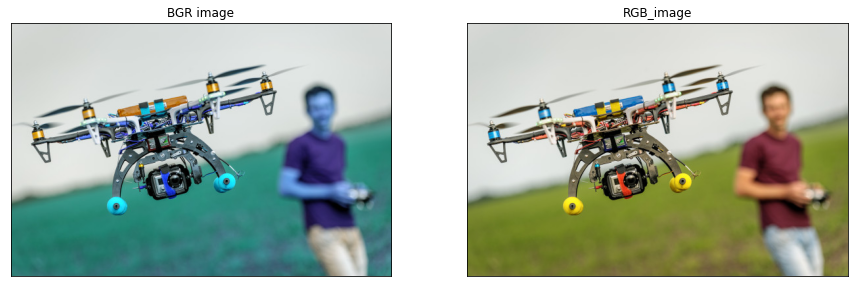

In [ ]:
#loading image
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/Yolo/darknet/images/toy-drone.jpg") ## BGR format
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_two_images(img,rgb_img, 'BGR image', 'RGB_image')
height, width, channels = img.shape
print(type(img),height, width, channels)
temp_image2 = rgb_img.copy() #for later usage

(1, 3, 416, 416) <class 'numpy.ndarray'>


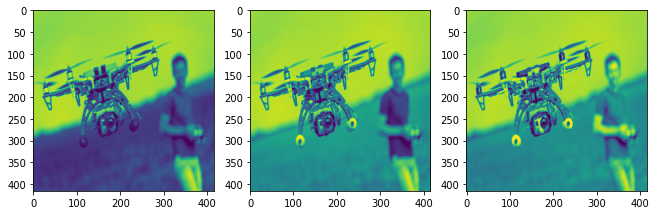

In [ ]:
#Detecting objects
## the main image needs to be converted into BLOB image for input of YOLO model
blob = cv2.dnn.blobFromImage(rgb_img, 0.00392, (416, 416), (0,0,0), True, crop = False)
print(blob.shape, type(blob)) # (1,3,416,416)

fig, axes = plt.subplots(ncols=3, figsize = (11,11))
for b in blob:
    for n, img_blob in enumerate(b):
        axes[n].imshow(img_blob)
plt.show()

In [ ]:
net.setInput(blob) # blob is passed into the network
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]  -1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)
## now 'outs' is the list containing information about all the detected objects

print(len(outs), type(outs))
print(outs[0].size)

3 <class 'list'>
3042


number of boxes  1
(386, 580, 3)
[0]
Drone


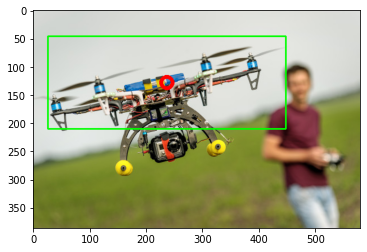

In [ ]:
# following lists will contain the classID, confidences and box-coordinates of detected classes.
confidences = []; class_ids = []; boxes = []
# COLORS = np.random.randint(0, 255, size=(len([1]), 3),
# 	dtype="uint8")
height, width, channels = img.shape
for out in outs:
    for detection in out:
        scores = detection[5:] # scores contain the confidence for each class on the detected object
        class_id=np.argmax(scores) # the maximum confidence is the most-probable class
        confidence = scores[class_id] # taking the ID of the most likely class
        if confidence >0.5:
            #object is detected
            ## finding the co-ordinates to bound-box
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w= int(detection[2]*width)
            h= int(detection[3]*height)
            ## rectangle coordinates
            x= int(center_x - w/2)
            y= int(center_y - h/2)
            
            cv2.rectangle(rgb_img, (x,y), (x+w, y+h), (0,255,0),2)
            cv2.circle(rgb_img, (center_x, center_y), 10, (255, 0, 0),5)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            

# idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.4, 0.3)
# if len(idxs) > 0:
# 	# loop over the indexes we are keeping
# 	for i in idxs.flatten():
# 		# extract the bounding box coordinates
# 		(x, y) = (boxes[i][0], boxes[i][1])
# 		(w, h) = (boxes[i][2], boxes[i][3])
# 		# draw a bounding box rectangle and label on the image
# 		color = [int(c) for c in COLORS[class_ids[i]]]
# 		cv2.rectangle(rgb_img, (x, y), (x + w, y + h), color, 2)
# 		text = "{}: {:.4f}".format('Drone', confidences[i])
# 		cv2.putText(rbg_img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
# 			0.5, color, 2)
myPlt = plt.imshow(rgb_img)

fig = myPlt.get_figure()
fig.savefig("/content/drive/My Drive/Colab Notebooks/Yolo/darknet/output-detection/output_detection.png")

print('number of boxes ', len(boxes))
print(temp_image2.shape)

print(class_ids)
for id in class_ids:
    print(classes[id]) ## these classes have been detected
# for id in confidence:
#     print(classes[id]) ## these classes have been detected

    
## we can see that some classes have been detected twice. That's why we can see more bounding boxes. 
# Lets remove redundant boxes.

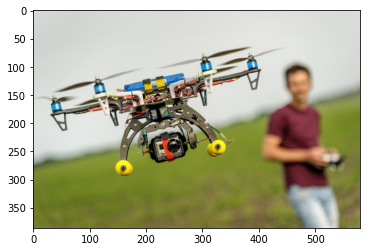

In [ ]:
plt.imshow(temp_image2) # we'll make out further analysis on the image that we copied before

In [ ]:
## this block of codes could be used if we wanted a random color-box for each classes.
#colors = np.random.uniform(0, 255, size = (len(classes), 3))
#print(colors)

In [ ]:
#help(cv2.dnn.NMSBoxes)

[[0]]
Drone


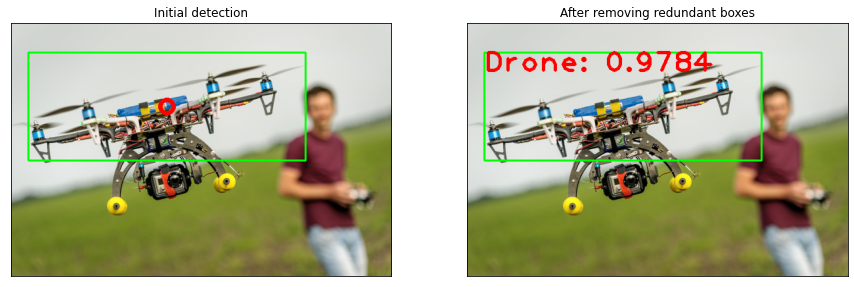

In [ ]:
## removing redundant boxes

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

print(indexes) # these indexes are the unique ones

font = cv2.FONT_HERSHEY_PLAIN

for i in range (len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])

        #color= colors[i]
        text = "{}: {:.4f}".format('Drone', confidences[i])
        cv2.rectangle(temp_image2, (x, y), (x + w, y + h), (0,255,0), 2)
        cv2.putText(temp_image2, text, (x, y + 30), font, 3, (255,0,0), 3)
        print(label) # just for analysis purpose
    
plot_two_images(rgb_img, temp_image2, 'Initial detection', 'After removing redundant boxes')

In [ ]:
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Yolo/darknet/Out/output_detection.png', rgb_img)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Yolo/darknet/Result-img/result.png', temp_image2)

True

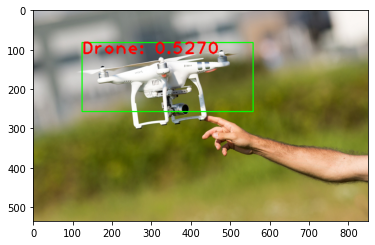

In [ ]:
result_image = cv2.imread('/content/drive/My Drive/Colab Notebooks/Yolo/darknet/Result-img/result.png')
plt.imshow(result_image)